In [1]:
import pickle
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def extract(words):
    return dict([(word, True) for word in words])

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')




f = open('classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()


In [2]:
opinion={}

f=open('r.txt','r')
pos,neg=0,0
for line in f:
    chat=line.split('-')[1].split(':')[1]
    name=line.split('-')[1].split(':')[0]
    print(name,chat)
    if opinion.get(name,None) is None:
        opinion[name]=[0,0]
    res=classifier.classify(extract(chat))
    if res=='pos':
        pos+=1
        opinion[name][0]+=1
    else:
        neg+=1
        opinion[name][1]+=1
print(pos,neg)

 Baba  You should not go to Lucknow

 Mom  You have to take class so don't go there

 Ankit  There are NPTEL exam on 15 november and when will you study

 Badal  Don't  be foolish bro just go and participate

 DJ  Wow just go participate in Hackathon for better experience

 Brother  This is opportunity just go

 Sister  Go and try to explore yourself you will meet to great people

 Dad  so when are you going? 

 Mom  so when are you going i will prepare food for you.

6 3


In [3]:
names,positive,negative=[],[],[]
for name in opinion:
    names.append(name)
    positive.append(opinion[name][0])
    negative.append(opinion[name][1])


<IPython.core.display.Javascript object>


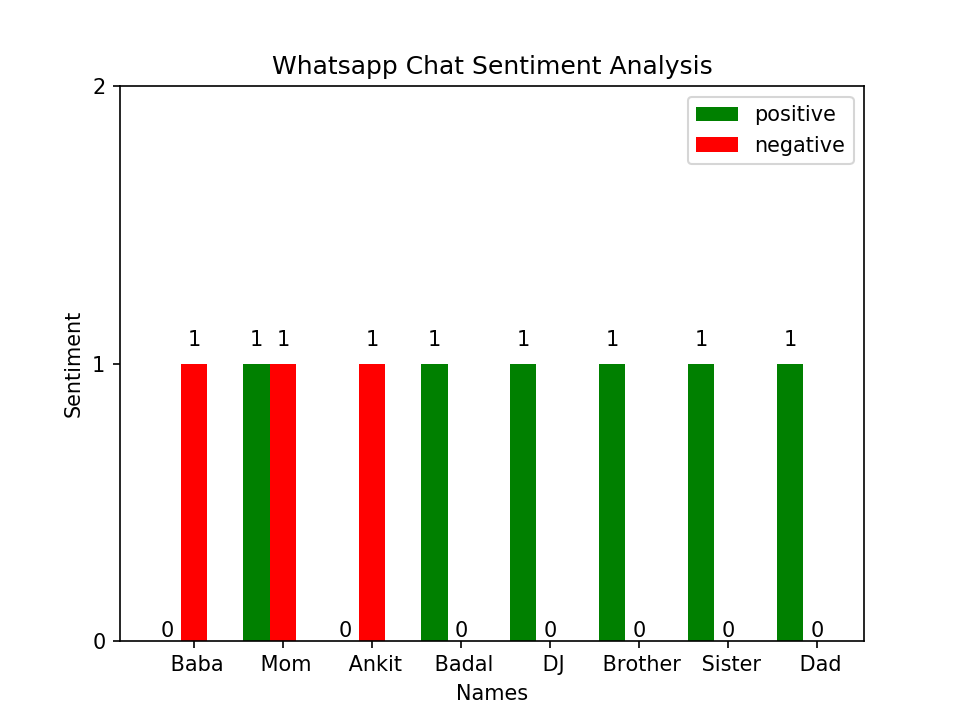

In [4]:
ind = np.arange(len(names))
width=0.3
max_x=max(max(positive),max(negative))+2

fig = plt.figure()
ax = fig.add_subplot()

yvals = positive
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = negative
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_xlabel('Names')
ax.set_ylabel('Sentiment')

ax.set_xticks(ind+width)
ax.set_yticks(np.arange(0,max_x,1))
ax.set_xticklabels( names )
ax.legend( (rects1[0], rects2[0]), ('positive', 'negative') )
ax.set_title('Whatsapp Chat Sentiment Analysis')


autolabel(rects1)
autolabel(rects2)

plt.show()

